In [104]:
import pandas as pd
import numpy as np 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import matplotlib.cbook as cbook

In [4]:
data_customers = pd.read_csv('/Users/marielebreton/Documents/TheHackingProject/Semaines Data Analyste/Week5/Day3/dataset_bookstore/customers.csv', sep=',')
data_products = pd.read_csv('/Users/marielebreton/Documents/TheHackingProject/Semaines Data Analyste/Week5/Day3/dataset_bookstore/products.csv', sep=',')
data_transactions = pd.read_csv('/Users/marielebreton/Documents/TheHackingProject/Semaines Data Analyste/Week5/Day3/dataset_bookstore/transactions.csv', sep=',')


# FUSION DES TABLES

In [36]:
#fusion des tables custom et transac

data_customers_transactions = pd.merge(left = data_transactions, right = data_customers, how = "left", left_on="client_id", right_on="client_id")

data_customers_transactions





,id_prod,date,session_id,client_id,sex,birth
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,f,1977
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277,f,2000
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270,f,1979
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597,m,1963
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242,f,1980
...,...,...,...,...,...,...
337011,1_671,2021-05-28 12:35:46.214839,s_40720,c_3454,m,1969
337012,0_759,2021-06-19 00:19:23.917703,s_50568,c_6268,m,1991
337013,0_1256,2021-03-16 17:31:59.442007,s_7219,c_4137,f,1968
337014,2_227,2021-10-30 16:50:15.997750,s_112349,c_5,f,1994


In [6]:
#fusion des 3

df = pd.merge(left = data_customers_transactions, right = data_products, how = "left", left_on="id_prod", right_on="id_prod")

df

,id_prod,date,session_id,client_id,sex,birth,price,categ
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,f,1977,4.99,0.0
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277,f,2000,65.75,2.0
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270,f,1979,10.71,1.0
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597,m,1963,4.20,0.0
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242,f,1980,8.99,0.0
...,...,...,...,...,...,...,...,...
337011,1_671,2021-05-28 12:35:46.214839,s_40720,c_3454,m,1969,31.99,1.0
337012,0_759,2021-06-19 00:19:23.917703,s_50568,c_6268,m,1991,22.99,0.0
337013,0_1256,2021-03-16 17:31:59.442007,s_7219,c_4137,f,1968,11.03,0.0
337014,2_227,2021-10-30 16:50:15.997750,s_112349,c_5,f,1994,50.99,2.0


# CLEANING

In [7]:
#vérifier dans quelles colonnes on trouve des valeurs manquantes : price et categ : 103
bool_series = pd.isnull(df["categ"])
df[bool_series]

,id_prod,date,session_id,client_id,sex,birth,price,categ
6235,0_2245,2021-06-17 03:03:12.668129,s_49705,c_1533,m,1972,NaN,NaN
10802,0_2245,2021-06-16 05:53:01.627491,s_49323,c_7954,m,1973,NaN,NaN
14051,0_2245,2021-11-24 17:35:59.911427,s_124474,c_5120,f,1975,NaN,NaN
17486,0_2245,2022-02-28 18:08:49.875709,s_172304,c_4964,f,1982,NaN,NaN
21078,0_2245,2021-03-01 00:09:29.301897,s_3,c_580,m,1988,NaN,NaN
...,...,...,...,...,...,...,...,...
322710,0_2245,2021-04-06 19:59:19.462288,s_16936,c_4167,f,1979,NaN,NaN
329417,0_2245,2021-03-30 23:29:02.347672,s_13738,c_7790,f,1983,NaN,NaN
330490,0_2245,2021-12-03 14:14:40.444177,s_128815,c_6189,f,1984,NaN,NaN
335531,0_2245,2021-04-27 18:58:47.703374,s_26624,c_1595,f,1973,NaN,NaN


In [8]:
#fill with 0
df['price'] = df['price'].fillna(0)
df['categ'] = df['categ'].fillna(0)

In [9]:
#recheck : OK
bool_series_bis = pd.isnull(df["categ"])
df[bool_series_bis]

,id_prod,date,session_id,client_id,sex,birth,price,categ


In [10]:
#verifier data type 
df.dtypes

id_prod        object
date           object
session_id     object
client_id      object
sex            object
birth           int64
price         float64
categ         float64
dtype: object

In [11]:
#reformater dates qui sont des objets en supprimant le texte "test_"
df['date'] = (df.date.replace('test_','',regex=True))

In [12]:
#vérifier que le texte a bien sauté
df.groupby("date").size().sort_values()

date
2021-03-01 00:01:07.843138     1
2021-11-08 19:25:06.276495     1
2021-11-08 19:22:52.129186     1
2021-11-08 19:21:28.697349     1
2021-11-08 19:20:58.510797     1
                              ..
2021-03-01 02:30:02.237414     8
2021-03-01 02:30:02.237443     8
2021-03-01 02:30:02.237444     8
2021-03-01 02:30:02.237427     8
2021-03-01 02:30:02.237413    13
Length: 336855, dtype: int64

In [13]:
#on convertit date au format date
df['date'] = pd.to_datetime(df['date'])

In [14]:
#on check que c'est ok
df.dtypes

id_prod               object
date          datetime64[ns]
session_id            object
client_id             object
sex                   object
birth                  int64
price                float64
categ                float64
dtype: object

In [15]:
#check si il y a value aberrante dans date
df["date"].sort_values()


176588   2021-03-01 00:01:07.843138
95285    2021-03-01 00:02:26.047414
216737   2021-03-01 00:02:38.311413
180767   2021-03-01 00:04:54.559692
293481   2021-03-01 00:05:18.801198
                    ...            
208601   2022-02-28 23:56:57.196281
242599   2022-02-28 23:56:57.561424
6245     2022-02-28 23:57:12.741573
301528   2022-02-28 23:59:02.381670
79892    2022-02-28 23:59:58.040472
Name: date, Length: 337016, dtype: datetime64[ns]

In [16]:
#check si il y a value aberrante dans price
df["price"].sort_values()

126679     -1.0
195812     -1.0
195809     -1.0
275002     -1.0
195764     -1.0
          ...  
50236     300.0
115167    300.0
81845     300.0
53813     300.0
328631    300.0
Name: price, Length: 337016, dtype: float64

In [17]:
#check si il y a value aberrante dans id prod
df["id_prod"].sort_values()

207531    0_0
74507     0_0
151180    0_0
210010    0_0
103860    0_0
         ... 
47170     T_0
259134    T_0
2365      T_0
271894    T_0
34387     T_0
Name: id_prod, Length: 337016, dtype: object

In [20]:
#suppression value aberrante date
df_dates = df.loc[(df['date'] < '2022-02-09 00:00:00')]
df_dates

,id_prod,date,session_id,client_id,sex,birth,price,categ
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,f,1977,4.99,0.0
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277,f,2000,65.75,2.0
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270,f,1979,10.71,1.0
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597,m,1963,4.20,0.0
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242,f,1980,8.99,0.0
...,...,...,...,...,...,...,...,...
337011,1_671,2021-05-28 12:35:46.214839,s_40720,c_3454,m,1969,31.99,1.0
337012,0_759,2021-06-19 00:19:23.917703,s_50568,c_6268,m,1991,22.99,0.0
337013,0_1256,2021-03-16 17:31:59.442007,s_7219,c_4137,f,1968,11.03,0.0
337014,2_227,2021-10-30 16:50:15.997750,s_112349,c_5,f,1994,50.99,2.0


In [21]:
#suppression value aberrante price
df_dates_prices = df_dates.loc[(df_dates['price'] >= 0)]
df_dates_prices

,id_prod,date,session_id,client_id,sex,birth,price,categ
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,f,1977,4.99,0.0
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277,f,2000,65.75,2.0
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270,f,1979,10.71,1.0
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597,m,1963,4.20,0.0
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242,f,1980,8.99,0.0
...,...,...,...,...,...,...,...,...
337011,1_671,2021-05-28 12:35:46.214839,s_40720,c_3454,m,1969,31.99,1.0
337012,0_759,2021-06-19 00:19:23.917703,s_50568,c_6268,m,1991,22.99,0.0
337013,0_1256,2021-03-16 17:31:59.442007,s_7219,c_4137,f,1968,11.03,0.0
337014,2_227,2021-10-30 16:50:15.997750,s_112349,c_5,f,1994,50.99,2.0


In [22]:
df_dates_prices["price"].sort_values()

311651      0.0
329417      0.0
221975      0.0
239973      0.0
312637      0.0
          ...  
115167    300.0
81845     300.0
53813     300.0
303397    300.0
281271    300.0
Name: price, Length: 315506, dtype: float64

In [23]:
#suppression value aberrante price : correspondent aux prices négatifs donc déjà supprimés


df_final = df_dates_prices.loc[(df_dates_prices['id_prod'] != 'T_0')]
df_final



,id_prod,date,session_id,client_id,sex,birth,price,categ
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,f,1977,4.99,0.0
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277,f,2000,65.75,2.0
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270,f,1979,10.71,1.0
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597,m,1963,4.20,0.0
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242,f,1980,8.99,0.0
...,...,...,...,...,...,...,...,...
337011,1_671,2021-05-28 12:35:46.214839,s_40720,c_3454,m,1969,31.99,1.0
337012,0_759,2021-06-19 00:19:23.917703,s_50568,c_6268,m,1991,22.99,0.0
337013,0_1256,2021-03-16 17:31:59.442007,s_7219,c_4137,f,1968,11.03,0.0
337014,2_227,2021-10-30 16:50:15.997750,s_112349,c_5,f,1994,50.99,2.0


## Graphe 6 : RÉPARTITION DES PRODUITS PAR CATÉGORIE

(-0.05500000000000001,
 0.05500000000000001,
 -0.05500000000000001,
 0.05500000000000001)

([<matplotlib.patches.Wedge at 0x7f99f4875d30>,
 [Text(-0.41748607451491937, 1.0176961125926163, '0.0'),
  Text(0.2486355895761099, -1.0715317744220842, '1.0'),
  Text(1.085723292885369, -0.17664917573017763, '2.0')],
 [Text(-0.2277196770081378, 0.5551069705050634, '62.4%'),
  Text(0.13561941249605994, -0.5844718769575005, '32.5%'),
  Text(0.5922127052102013, -0.09635409585282415, '5.1%')])

Text(0.5, 1.0, ' Products Quantity - Category Breakdown')

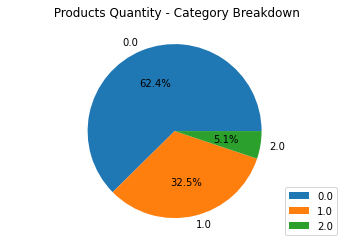

In [33]:
#définir liste catégories
products = ['0.0', '1.0', '2.0']

#définir liste des sommes produits
books = df_final.groupby('categ').size().tolist()


#creating plot
plt.axis("equal")
plt.pie(books, labels = products, autopct='%1.1f%%')


#mettre en forme
plt.legend(loc='lower right')
plt.title(' Products Quantity - Category Breakdown')
plt.show()

## Graphe 7 : EVOLUTION DU CA POUR CHAQUE CATEGORIE

In [97]:
df_books = df_final.sort_values(by=['date'])
df_books_days = df_books
df_books_days['date'] = pd.to_datetime(df_books['date'], utc=True).dt.date
df_books_days['date'] = pd.to_datetime(df_books_days['date'])
df_books_days


,id_prod,date,session_id,client_id,sex,birth,price,categ
176588,0_1259,2021-03-01,s_1,c_329,f,1967,11.99,0.0
95285,0_1390,2021-03-01,s_2,c_664,m,1960,19.37,0.0
216737,0_1352,2021-03-01,s_3,c_580,m,1988,4.50,0.0
180767,0_1458,2021-03-01,s_4,c_7912,f,1989,6.55,0.0
293481,0_1358,2021-03-01,s_5,c_2033,f,1956,16.49,0.0
...,...,...,...,...,...,...,...,...
249173,1_264,2022-02-08,s_162176,c_1609,m,1980,16.07,1.0
231380,0_2172,2022-02-08,s_162177,c_8252,f,1989,3.88,0.0
307441,1_54,2022-02-08,s_162178,c_3210,f,1983,18.88,1.0
327802,0_1006,2022-02-08,s_162177,c_8252,f,1989,26.64,0.0


In [96]:
df_books_days.dtypes

id_prod               object
date          datetime64[ns]
session_id            object
client_id             object
sex                   object
birth                  int64
price                float64
categ                float64
dtype: object

In [98]:
df_cat0 = df_books_days.loc[df_books_days['categ']== 0.0]
df_cat0
df_cat1 = df_books_days.loc[df_books_days['categ']== 1.0]
df_cat1
df_cat2 = df_books_days.loc[df_books_days['categ']== 2.0]
df_cat2

,id_prod,date,session_id,client_id,sex,birth,price,categ
176588,0_1259,2021-03-01,s_1,c_329,f,1967,11.99,0.0
95285,0_1390,2021-03-01,s_2,c_664,m,1960,19.37,0.0
216737,0_1352,2021-03-01,s_3,c_580,m,1988,4.50,0.0
180767,0_1458,2021-03-01,s_4,c_7912,f,1989,6.55,0.0
293481,0_1358,2021-03-01,s_5,c_2033,f,1956,16.49,0.0
...,...,...,...,...,...,...,...,...
73481,0_2137,2022-02-08,s_162161,c_1609,m,1980,15.99,0.0
50834,0_1366,2022-02-08,s_162172,c_4455,f,1984,16.65,0.0
6821,0_1472,2022-02-08,s_162170,c_4706,f,1982,12.49,0.0
231380,0_2172,2022-02-08,s_162177,c_8252,f,1989,3.88,0.0


,id_prod,date,session_id,client_id,sex,birth,price,categ
253637,1_445,2021-03-01,s_8,c_7991,m,1968,23.99,1.0
322215,1_556,2021-03-01,s_9,c_6171,m,1983,24.47,1.0
309544,1_635,2021-03-01,s_10,c_2218,f,1970,26.99,1.0
145207,1_503,2021-03-01,s_12,c_2505,f,1982,26.99,1.0
63764,1_310,2021-03-01,s_4,c_7912,f,1989,14.20,1.0
...,...,...,...,...,...,...,...,...
35713,1_441,2022-02-08,s_162174,c_5821,f,1975,24.99,1.0
57292,1_493,2022-02-08,s_162175,c_5860,m,1972,10.99,1.0
249173,1_264,2022-02-08,s_162176,c_1609,m,1980,16.07,1.0
307441,1_54,2022-02-08,s_162178,c_3210,f,1983,18.88,1.0


,id_prod,date,session_id,client_id,sex,birth,price,categ
329732,2_153,2021-03-01,s_29,c_2627,m,2004,139.99,2.0
300221,2_62,2021-03-01,s_39,c_184,m,2004,60.96,2.0
119307,2_162,2021-03-01,s_61,c_1566,m,2004,102.82,2.0
112391,2_41,2021-03-01,s_67,c_7908,f,2001,68.99,2.0
51619,2_208,2021-03-01,s_61,c_1566,m,2004,54.87,2.0
...,...,...,...,...,...,...,...,...
139681,2_226,2022-02-08,s_162146,c_2085,m,2003,65.75,2.0
34465,2_108,2022-02-08,s_162149,c_2360,m,1993,63.36,2.0
14582,2_39,2022-02-08,s_162150,c_4958,m,1999,57.99,2.0
312821,2_110,2022-02-08,s_162156,c_6891,m,1994,62.25,2.0


In [128]:
table1 = pd.pivot_table(df_cat0, values="price", index=["date"], aggfunc=np.sum)
table1
table2 = pd.pivot_table(df_cat1, values="price", index=["date"], aggfunc=np.sum)
table2
table3 = pd.pivot_table(df_cat2, values="price", index=["date"], aggfunc=np.sum)
table3

,price
date,
2021-03-01,6259.66
2021-03-02,6715.28
2021-03-03,6112.06
2021-03-04,5888.49
2021-03-05,5969.99
...,...
2022-02-04,5994.98
2022-02-05,5776.02
2022-02-06,6430.64


,price
date,
2021-03-01,6811.53
2021-03-02,5627.15
2021-03-03,5691.41
2021-03-04,6098.98
2021-03-05,7071.21
...,...
2022-02-04,8259.23
2022-02-05,8130.39
2022-02-06,7833.93


,price
date,
2021-03-01,3345.05
2021-03-02,2995.04
2021-03-03,2948.28
2021-03-04,3059.62
2021-03-05,4132.21
...,...
2022-02-04,5021.95
2022-02-05,4640.25
2022-02-06,5002.79


Text(0, 0.5, 'CA')

Text(0.5, 0, 'Time')

Text(0.5, 1.0, 'Revenue evolution by Product Category')

AttributeError: 'XAxis' object has no attribute 'set_major_loc'

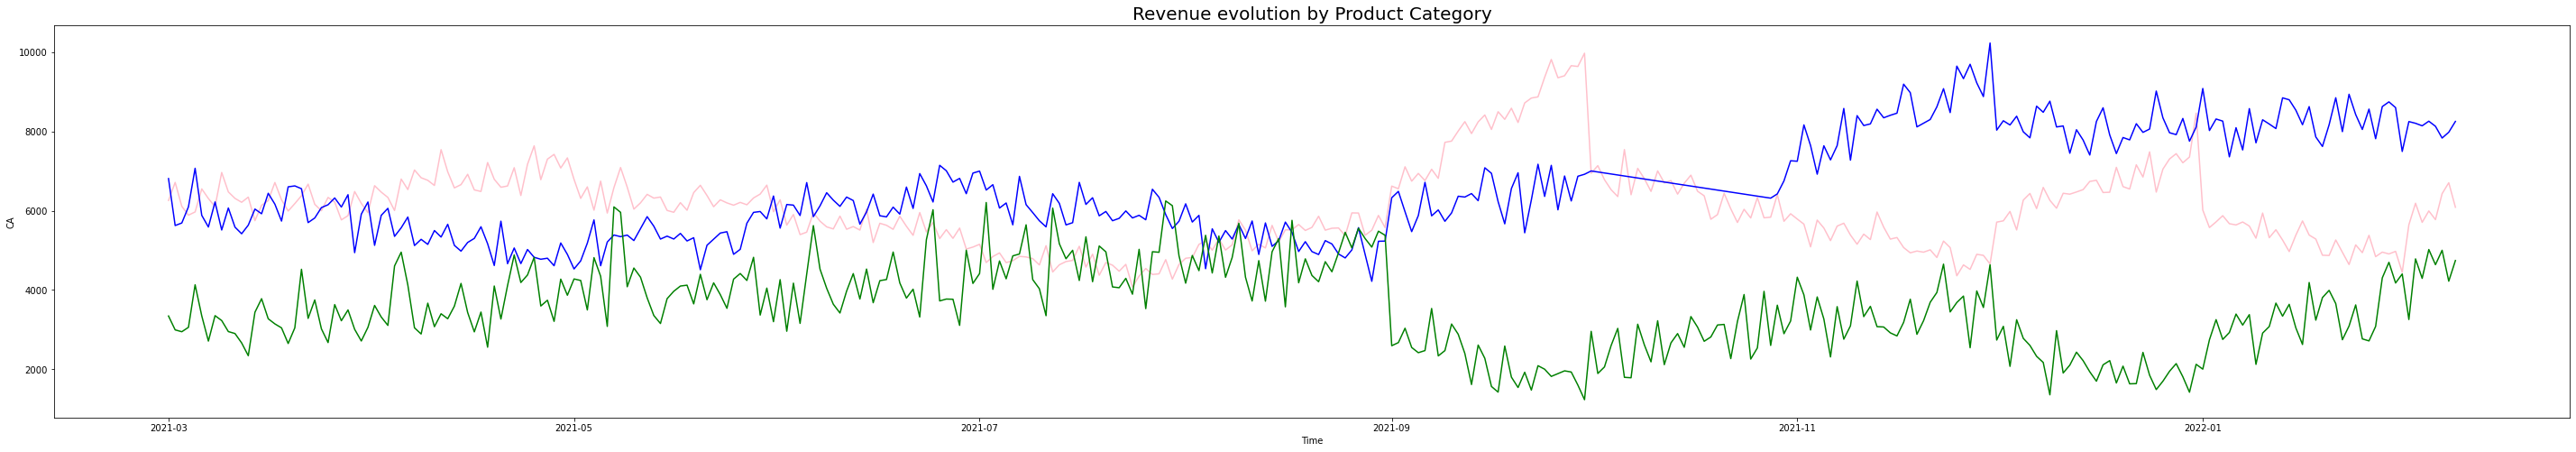

In [136]:
#déterminer taille matrice
fig, axe = plt.subplots(figsize=(50,8))



#détermine valeurs ordonnées
y1 = table1.iloc[:]['price']
y2 = table2.iloc[:]['price']
y3 = table3.iloc[:]['price']


#création plot
plt.plot(table1.index.values, y1 , color="pink", label="0.0")
plt.plot(table2.index.values, y2 , color="blue", label="1.0")
plt.plot(table3.index.values, y3 , color="green", label="2.0")



#on met en forme
plt.ylabel('CA')
plt.xlabel('Time')
plt.title('Revenue evolution by Product Category', fontsize=20)

axe.xaxis.set_major_loc


#on affiche
plt.show()